In [9]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

In [1]:
import pandas as pd
data = pd.read_csv("Clean_Data_Before_Covid.csv")
data.head()

,id,final
0,ffbxc48,alternative economic model needed native ameri...
1,ffc5i6h,splutters tea dude owns duchy cornwall sure he...
2,ff8z7yf,garbage half necessarily correct spell hair co...
3,ff8znss,hello thank comment dedicated learn strive eco...
4,ff8i5we,sounds great wood wooden buildings look nice d...


In [12]:
df = pd.read_csv("finalmerged.csv")
df.head()

,id,content
0,ffbxc48,"An alternative economic model is needed, but N..."
1,ffc5i6h,\*splutters tea everywhere\* The dude _owns_ t...
2,ff8z7yf,This is garbage.\n\nHalf of these aren't even ...
3,ff8znss,"Hello, thank you for your comment. \nI am myse..."
4,ff8i5we,It sounds great using wood and wooden building...


In [13]:
df.shape

(33239, 2)

In [14]:
df= df.replace(r'\n',' ', regex=True)
df = df.replace(r'\\n',' ', regex=True)
df = df.replace(r'/r/',' ', regex=True)

In [16]:
df = df.dropna()

In [17]:
df1 = df.copy()

In [18]:
df1 = df1.rename(columns={'content':'body'})

In [19]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1 = df1.loc[df1["body"] != "[removed]"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Thank you!"]
df1 = df1.loc[df1["body"] != '!emissionsbot']
df1 = df1.loc[df1["body"] != 'Thank you']
df1 = df1.loc[df1["body"] != 'Thank you.']
df1 = df1.loc[df1["body"] != '/r/careerguidance']
df1 = df1.loc[df1["body"] != 'Thanks!']
df1 = df1.loc[df1["body"] != 'No']
df1 = df1.loc[df1["body"] != 'Lol']
df1 = df1.loc[df1["body"] != 'No.']
df1 = df1.loc[df1["body"] != 'Source?']
df1 = df1.loc[df1["body"] != 'x-post: /r/EnviroNews']
df1 = df1.loc[df1["body"] != 'Thank you!!!']
df1 = df1.loc[df1["body"] != '?']
df1 = df1.loc[df1["body"] != 'Thanks']
df1 = df1.loc[df1["body"] != 'Yes']
df1 = df1.loc[df1["body"] != 'Yes.']
df1 = df1.loc[df1["body"] != 'Thank you!!']
df1 = df1.loc[df1["body"] != ':(']
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1 = df1.loc[df1["body"] != 'Green  ']

In [20]:
df1.shape

(32357, 2)

In [21]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"OMG": "Surprised",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}

In [22]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [23]:
df1["body"] =df1["body"].apply(lambda x: slang(x))

In [24]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"here's": "here is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [25]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [26]:
df1["body"] =df1["body"].apply(lambda x: cont_to_exp(x))

# Text Wrangling and Pre-processing


In [3]:
nlp = spacy.load("en_core_web_sm", parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()


## Remove accented characters

In [4]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [5]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [29]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

## Remove stopwords

In [31]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Text lemmatization

In [32]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")


'My system keep crash ! his crash yesterday , ours crash daily'

## Building a text normalizer

In [84]:
import neattext as nt 

In [78]:
def normalize_corpus(corpus, html_stripping=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        
        # strip HTML
        if html_stripping:
            doc = nt.remove_html_tags(doc)
            doc = nt.remove_urls(doc)
            doc = nt.remove_hashtags(doc)
        
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        
        # remove special characters and\or digits    
        if special_char_removal:
            doc = nt.remove_special_characters(doc)
            doc = nt.remove_puncts(doc)
            
        
        # remove extra whitespace
        doc = nt.remove_multiple_spaces(doc)
        
        
        # remove stopwords
        if stopword_removal:
            doc = nt.remove_stopwords(doc)
            doc = nt.remove_currencies(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [79]:
df1.head()

,id,body
0,ffbxc48,"an alternative economic model is needed, but n..."
1,ffc5i6h,\*splutters tea everywhere\* the dude _owns_ t...
2,ff8z7yf,this is garbage. half of these are not / am n...
3,ff8znss,"hello, thank you for your comment. i am mysel..."
4,ff8i5we,it sounds great using wood and wooden building...


In [81]:
df1.shape

(32357, 2)

In [80]:
news_df = df1.copy()

## Pre-process and normalize news articles

In [82]:
news_df['clean_text'] = normalize_corpus(news_df['body'])

In [83]:
news_df.head()

,id,body,clean_text
0,ffbxc48,"an alternative economic model is needed, but n...",alternative economic model need native america...
1,ffc5i6h,\*splutters tea everywhere\* the dude _owns_ t...,splutters tea dude duchy cornwall sure somewha...
2,ff8z7yf,this is garbage. half of these are not / am n...,garbage half necessarily correct spell hair co...
3,ff8znss,"hello, thank you for your comment. i am mysel...",hello thank comment dedicated learn strive eco...
4,ff8i5we,it sounds great using wood and wooden building...,sound great use wood wooden building look nice...


In [86]:
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['body', 'clean_text']].to_dict()

{'body': '\\*splutters tea everywhere\\* the dude _owns_ the duchy of cornwall. sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.',
 'clean_text': 'splutters tea dude duchy cornwall sure somewhat environmentally friendly personally benefit hugely business usual'}

In [87]:
news_df.to_csv('Clean&NotClean_together.csv', index=False, encoding='utf-8')

## Tagging Parts of Speech


The Part of speech tagging or POS tagging is the process of marking a word in the text to a particular part of speech based on both its context and definition. In simple language, we can say that POS tagging is the process of identifying a word as nouns, pronouns, verbs, adjectives, etc.


**Why POS tag is used**

Some words can function in more than one way when used in different circumstances. The POS Tagging here plays a crucial role to understand in what context the word is used in the sentence. POS Tagging is useful in sentence parsing, information retrieval, sentiment analysis, etc.

In [88]:
corpus = normalize_corpus(news_df['body'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

In [89]:
sentence = str(news_df.iloc[1].body)
sentence_nlp = nlp(sentence)

### a) SPACY POS Tagger

POS Tagging in Spacy library is quite easy as seen in the below example. We just instantiate a Spacy object as doc. We iterate over doc object and use pos_ , tag_, to print the POS tag. Spacy also lets you access the detailed explanation of POS tags by using spacy.explain() function which is also printed in the same iteration along with POS tags.

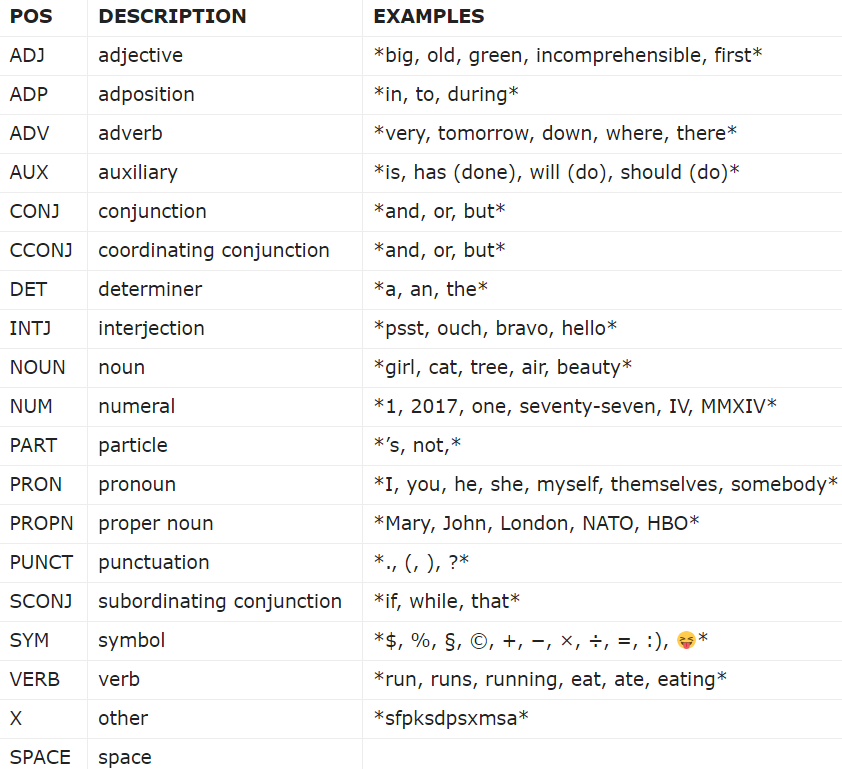

In [92]:
spacy_pos_tagged = [(word, word.tag_, word.pos_, word.dep_, spacy.explain(word.pos_), spacy.explain(word.tag_) ) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type', "DEP", "POS Explained", "TAG Explained"])

,Word,POS tag,Tag type,DEP,POS Explained,TAG Explained
0,\*splutters,NNP,PROPN,ROOT,proper noun,"noun, proper singular"
1,tea,NN,NOUN,compound,noun,"noun, singular or mass"
2,everywhere\,NNP,PROPN,ROOT,proper noun,"noun, proper singular"
3,*,NFP,PUNCT,ROOT,punctuation,superfluous punctuation
4,the,DT,DET,det,determiner,determiner
5,dude,NN,NOUN,nsubj,noun,"noun, singular or mass"
6,_,NNP,PROPN,nsubj,proper noun,"noun, proper singular"
7,owns,VBZ,VERB,ROOT,verb,"verb, 3rd person singular present"
8,_,NNP,PROPN,dobj,proper noun,"noun, proper singular"
9,the,DT,DET,det,determiner,determiner


In [109]:
a = spacy.load("en_core_web_sm")
doc = sentence_nlp

# Counting the frequencies of different POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
print(POS_counts)


{96: 4, 92: 5, 97: 3, 90: 2, 100: 4, 85: 2, 91: 1, 95: 2, 87: 1, 86: 4, 84: 2, 89: 1, 98: 1}


In [110]:
for k,v in sorted(POS_counts.items()):
    print(f'{k:{4}}. {doc.vocab[k].text:{5}}: {v}')

  84. ADJ  : 2
  85. ADP  : 2
  86. ADV  : 4
  87. AUX  : 1
  89. CCONJ: 1
  90. DET  : 2
  91. INTJ : 1
  92. NOUN : 5
  95. PRON : 2
  96. PROPN: 4
  97. PUNCT: 3
  98. SCONJ: 1
 100. VERB : 4


In [112]:
import spacy
from spacy import displacy

In [113]:
displacy.serve(doc, style="dep")

C:\Users\Naim Cavin\anaconda3\lib\runpy.py:194: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  return _run_code(code, main_globals, None,



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Parameters

- distance : Distance between token dipendencies.
- compact : Compactness of color.
- color : Color of the font.
- bg : Background color of the visualization.
- font : Style of the font in the visualization.

In [114]:
options = {'distance': 110, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}

displacy.serve(doc, style="dep",options=options)

C:\Users\Naim Cavin\anaconda3\lib\runpy.py:194: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  return _run_code(code, main_globals, None,



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### NLTK POS Tagger

In [91]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,\*splutters,NNS
1,tea,VBP
2,everywhere\*,IN
3,the,DT
4,dude,NN
5,_owns_,VBZ
6,the,DT
7,duchy,NN
8,of,IN
9,cornwall.,JJ


## Shallow Parsing or Chunking Text


In [116]:
from nltk.corpus import conll2000
data = conll2000.chunked_sents()

train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [117]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [118]:
tree = conlltags2tree(wtc) 
print(tree)

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [119]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [120]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)

In [121]:
ntc = NGramTagChunker(train_data)
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


<ipython-input-121-f013221b4a7e>:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(ntc.evaluate(test_data))


In [123]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP \*splutters/NNS)
  (VP tea/VBP)
  (PP everywhere\*/IN)
  (NP the/DT dude/NN)
  (VP _owns_/VBZ)
  (NP the/DT duchy/NN)
  (PP of/IN)
  (NP cornwall./JJ sure/JJ he’s/NN)
  (VP been/VBN somewhat/RB)
  environmentally/RB
  (NP friendly/JJ)
  but/CC
  (NP he’s/JJ)
  personally/RB
  (VP benefitted/VBN hugely/RB)
  (PP from/IN)
  (NP business/NN)
  (PP as/IN)
  (NP usual./NN))


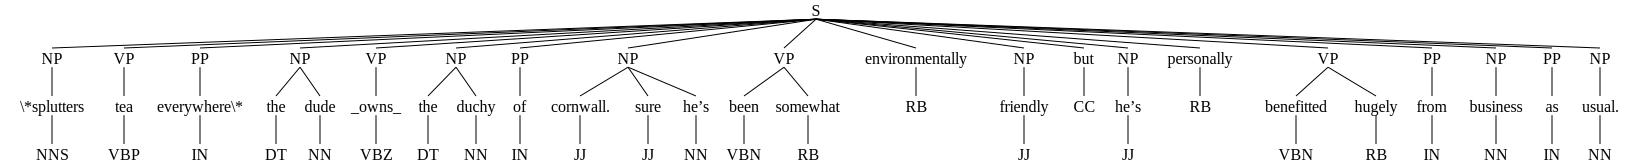

In [124]:
from IPython.display import display
display(chunk_tree)


## Constituency parsing


In [125]:
import os
java_path = "C:/Program Files/Java/jdk1.8.0_321/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [126]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='stanford-parser.jar',
                   path_to_models_jar='stanford-parser-4.2.0-models.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

<ipython-input-126-c2ca8aa05caa>:3: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser(path_to_jar='stanford-parser.jar',


(ROOT
  (FRAG
    (S
      (NP (NNP \*))
      (VP
        (VBZ splutters)
        (SBAR
          (S
            (NP (NN tea))
            (ADVP (RB everywhere))
            (VP
              (VBD \*)
              (SBAR
                (S (NP (DT the) (NN dude) (NN _)) (VP (VBZ owns)))))))))
    (NFP _)
    (S
      (S
        (NP (NP (DT the) (NN duchy)) (PP (IN of) (NP (NN cornwall))))
        (, .)
        (ADJP (JJ sure))
        (NP (PRP he))
        (VP
          (VBP ’s)
          (VP
            (VBN been)
            (ADJP (RB somewhat) (RB environmentally) (JJ friendly)))))
      (CC but)
      (S
        (NP (PRP he))
        (VP
          (VBP ’s)
          (ADJP
            (ADJP (RB personally) (JJ benefitted) (RB hugely))
            (PP (IN from) (NP (NN business))))
          (PP (IN as) (ADJP (JJ usual))))))
    (. .)))


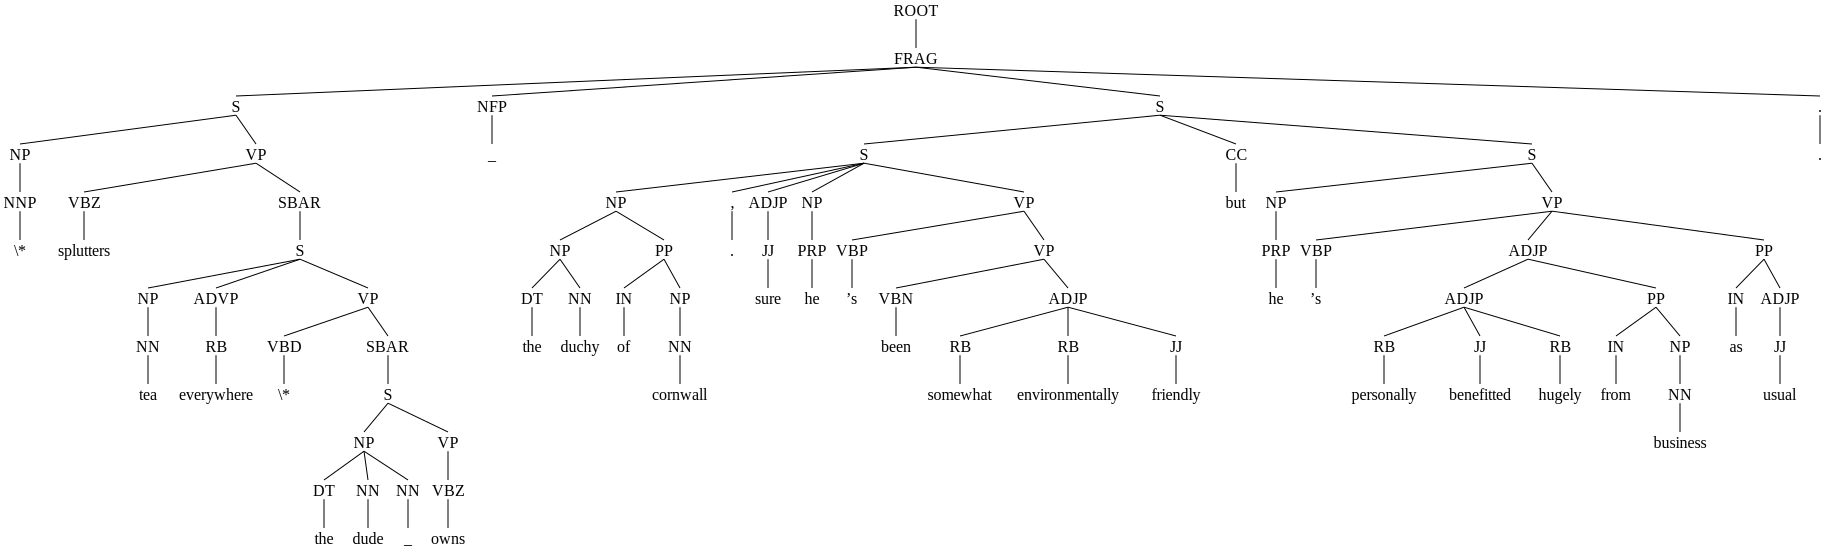

In [127]:
from IPython.display import display
os.environ['PATH'] = os.environ['PATH']+";C:\\Program Files\\gs\\gs9.09\\bin\\"
display(result[0])

## Dependency parsing

In [128]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---\*splutters[ROOT]--->[]
--------
[]<---tea[compound]--->[]
--------
['tea']<---everywhere\[ROOT]--->[]
--------
[]<---*[ROOT]--->[]
--------
[]<---the[det]--->[]
--------
['the']<---dude[nsubj]--->[]
--------
[]<---_[nsubj]--->[]
--------
['dude', '_']<---owns[ROOT]--->['_', 'duchy', '.']
--------
[]<---_[dobj]--->[]
--------
[]<---the[det]--->[]
--------
['the']<---duchy[dobj]--->['of']
--------
[]<---of[prep]--->['cornwall']
--------
[]<---cornwall[pobj]--->[]
--------
[]<---.[punct]--->[]
--------
[]<---sure[ROOT]--->['been']
--------
[]<---he[nsubj]--->[]
--------
[]<---’s[punct]--->[]
--------
['he', '’s']<---been[ccomp]--->['friendly', 'but', 'benefitted']
--------
[]<---somewhat[advmod]--->[]
--------
[]<---environmentally[advmod]--->[]
--------
['somewhat', 'environmentally']<---friendly[acomp]--->[]
--------
[]<---but[cc]--->[]
--------
[]<---he[nsubj]--->['’s']
--------
[]<---’s[punct]--->[]
--------
[]<---personally[advmod]--->[]
--------
['he', 'personally']<---benefi

In [129]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [131]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='stanford-parser.jar',
                               path_to_models_jar='stanford-parser-4.2.0-models.jar')    
result = list(sdp.raw_parse(sentence))  
dep_tree = [parse.tree() for parse in result][0]
print(dep_tree)

<ipython-input-131-991ebf72ef3f>:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  sdp = StanfordDependencyParser(path_to_jar='stanford-parser.jar',


(splutters
  \*
  (\* tea everywhere (owns (_ the dude)))
  _
  (friendly
    (duchy the (cornwall of))
    sure
    he
    ’s
    been
    somewhat
    environmentally
    (benefitted
      but
      he
      ’s
      personally
      hugely
      (business from)
      (usual as))))


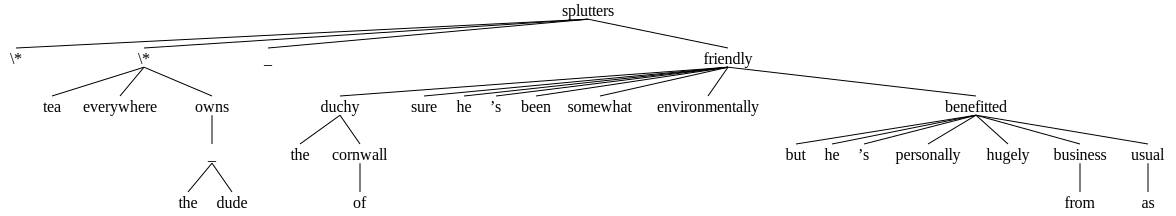

In [132]:
from IPython.display import display
display(dep_tree)

# Named Entity Recognition


In [144]:
sentence = str(news_df.iloc[0].body)
sentence_nlp = nlp(sentence)

In [145]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(native, 'NORP'), (americans, 'NORP'), (aboriginal, 'NORP'), (australians, 'NORP'), (thousands, 'DATE'), (of, 'DATE'), (years, 'DATE')]


In [146]:
displacy.render(sentence_nlp, style='ent', jupyter=True)

In [141]:
#sentence = str(news_df.iloc[0].clean_text)
#sentence_nlp = nlp(sentence)

In [142]:
#print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(americans, 'NORP'), (australian, 'NORP'), (model, 'DATE'), (thousand, 'DATE'), (year, 'DATE'), (west, 'LOC'), (colonize, 'LOC')]


In [143]:
#displacy.render(sentence_nlp, style='ent', jupyter=True)

In [147]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [148]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,spam,2,zero,1,3,second,100 %,today,china,earth,5,half,uk,india,u.s .
Entity Type,PERSON,CARDINAL,CARDINAL,CARDINAL,CARDINAL,ORDINAL,PERCENT,DATE,GPE,LOC,CARDINAL,CARDINAL,GPE,GPE,GPE
Frequency,489,430,405,391,324,307,303,300,275,224,208,206,201,199,198


In [150]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,PERSON,CARDINAL,DATE,GPE,NORP,PERCENT,LOC,QUANTITY,ORDINAL,TIME,MONEY,PRODUCT,FAC,WORK_OF_ART
Frequency,7421,6882,6052,5172,4601,2002,1653,943,911,641,505,252,198,92,90


## STANFORD NER

In [151]:
import nltk
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
import os

In [152]:
model = 'english.all.3class.distsim.crf.ser.gz'
jar = 'stanford-ner.jar'

In [155]:
sn = StanfordNERTagger(model, jar,encoding='utf-8')

In [168]:
txt = news_df["body"][0]+news_df["body"][1]+news_df["body"][2]+news_df["body"][3]+news_df["body"][4]+news_df["body"][5]

In [169]:
txt

'an alternative economic model is needed, but native americans, aboriginal australians, and many other indigenous peoples provide models that have been around for thousands of years that seemed to work.  as the west colonized their lands, they also silenced and erased their ways of living.  we might not need a new model, but rather to listen to all the voices that the prince\'s ancestors conquered and killed.  [from capitalism to indigenous thought](https://curiositiespodcast.org/the-sillycurious-post/families-and-communities/communing-with-nature/)\\*splutters tea everywhere\\* the dude _owns_ the duchy of cornwall. sure he’s been somewhat environmentally friendly but he’s personally benefitted hugely from business as usual.this is garbage.  half of these are not / am not even necessarily correct. and you did not even spell "hair" correctly.  and you included petroleum. wtf?   quit exploiting real issues to push your shitty blog.hello, thank you for your comment.  i am myself dedicate

In [170]:
from timeit import default_timer as timer
start = timer()
ner_tagged_sentences = [sn.tag(txt.split())]
end = timer()
print(end - start)

1.2807192000000214


**The time spent in Stanford NER is 1.3 seconds for 5 sample in dataset. However, our full dataset is 33K though it is just before  covid. It means that applying Stanford NER to full dataset takes 140 minutes that is extremely slow than SPACY.**

In [172]:
!pip install afinn

     ---------------------------------------- 52.6/52.6 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=3c53f3577be4a331687ef02aaf555fc71e09fd32f7ff0c4851e043a0a591945a
  Stored in directory: c:\users\naim cavin\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [173]:
from afinn import Afinn

af = Afinn()

In [174]:
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [191]:
del df

In [192]:
df = pd.DataFrame([list(news_df['body']), sentiment_scores, sentiment_category]).T
df.columns = ['body', 'sentiment_score', 'sentiment_category']


In [193]:
df.describe()

,body,sentiment_score,sentiment_category
count,32357,32357.0,32357
unique,31350,106.0,3
top,"sorry, your submission has been automatically ...",0.0,positive
freq,345,8852.0,16278


In [195]:
df.head()

,body,sentiment_score,sentiment_category
0,"an alternative economic model is needed, but n...",-3.0,negative
1,\*splutters tea everywhere\* the dude _owns_ t...,4.0,positive
2,this is garbage. half of these are not / am n...,-10.0,negative
3,"hello, thank you for your comment. i am mysel...",18.0,positive
4,it sounds great using wood and wooden building...,-5.0,negative


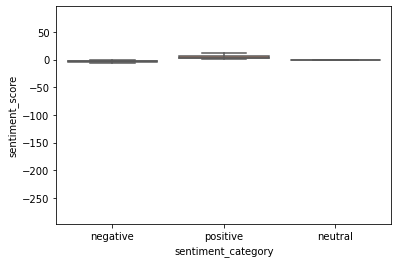

In [197]:
%matplotlib inline
ax = sns.boxplot(x="sentiment_category", y="sentiment_score",
data=df, palette="Set2", fliersize=0)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


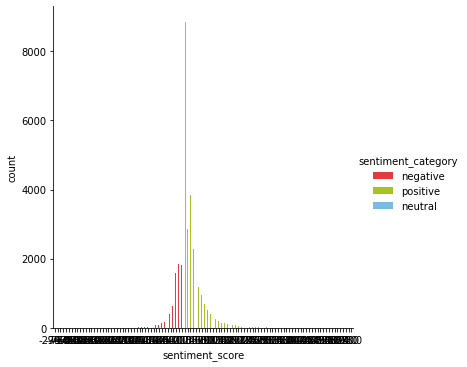

In [198]:
fc = sns.factorplot(x="sentiment_score", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [201]:
pos_idx = df[df.sentiment_score == 6].index[0]
neg_idx = df[df.sentiment_score == -15].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['body']][0])
print("---------------------------------------------------------------------")
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['body']][0])

Most Negative Tech News Article: not an answer, but a thought for others to consider when thinking about why most of our peers do not seem to value the environment....... most people are literally *afraid* of wild things and wilderness, afraid of what they do not know. people who do not live in open air most days, walk in the forest or the desert or wherever most days, are often afraid of being out there. and why would one value what they are afraid of?  until we fix this problem with us humans, fear of animals and plants and fungi, then we will not likely get people to fight for them. to conquer fear one has to conquer ignorance, but not in books or videos but by being out there and experiencing/appreciating all that there is.
---------------------------------------------------------------------
Most Positive Tech News Article: good news to know to start a good week!~


In [202]:
pos_idx = df[df.sentiment_score == 16].index[0]
neg_idx = df[df.sentiment_score == -12].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['body']][0])
print("---------------------------------------------------------------------")
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['body']][0])

Most Negative Tech News Article: which future generations? the ones that will die from hunger or violence because we fucked up the climate beyond repair and for which we left a scorching desert?
---------------------------------------------------------------------
Most Positive Tech News Article: i’ve been building vr stuff for the past 4 years, primarily because once it takes-off, humans will consume far less than they currently do, and travel much less often.  once you don a headset you inhabit an infinite variety of new worlds, which require nothing more than a sip of electricity to fulfill the wildest desires.  the more time people spend “there”, the less resources are purloined from the natural world, and everyone gets to enjoy a luxurious virtual life beyond what’s attainable in reality.  it’s truly a win-win.    even given the current tech, my carbon footprint has shrunk immensely.  i don’t desire to travel anymore, because i can do it better/faster in vr.  living space requirem

In [203]:
from textblob import TextBlob

sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [204]:
df = pd.DataFrame([list(news_df['body']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['body', 'sentiment_score', 'sentiment_category']

In [205]:
df.head()

,body,sentiment_score,sentiment_category
0,"an alternative economic model is needed, but n...",0.112,positive
1,\*splutters tea everywhere\* the dude _owns_ t...,0.205,positive
2,this is garbage. half of these are not / am n...,-0.117,negative
3,"hello, thank you for your comment. i am mysel...",0.214,positive
4,it sounds great using wood and wooden building...,0.285,positive


C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


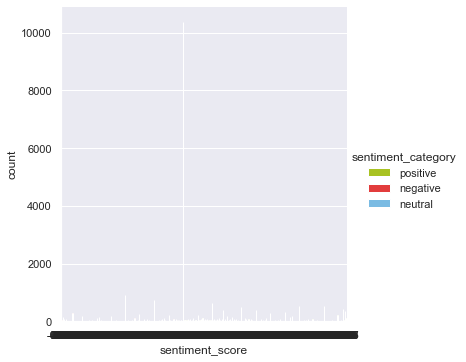

In [207]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fc = sns.factorplot(x="sentiment_score", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [208]:
pos_idx = df[df.sentiment_score == 0.7].index[0]
neg_idx = df[df.sentiment_score == -0.296].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['body']][0])
print("---------------------------------------------------------------------")
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['body']][0])

Most Negative Tech News Article: well, you don’t have to be explicit in connecting it to personal lifestyle choices.  often, people read so little on climate that they have no idea how bad it really is. if you fill that gap with the correct information, i’d imagine most people will follow up and find out what they can do to help.  underlying motivation must come first.
---------------------------------------------------------------------
Most Positive Tech News Article: good news to know to start a good week!~


In [218]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
def display_confusion_matrix_pretty(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    return cm_frame 

In [219]:
display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

TypeError: __new__() got an unexpected keyword argument 'label'

In [220]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

TypeError: __new__() got an unexpected keyword argument 'labels'